In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itables import init_notebook_mode, show, JavascriptCode

In [47]:
plt.style.use("ggplot")
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

# ERUM funding for accelerator research related projects

## Extract

1. Get list of projects via search form at [Förderkatalog](https://foerderportal.bund.de/foekat/jsp/SucheAction.do?actionMode=searchmask) using 
  - Projektträger = PT-DESY  
  - Nur lfd. Vorhaben = Nein
2. Download search result as csv file ("Ausgabe als Textdatei") 

In [48]:
raw = pd.read_csv("./data/projektfoerderung_pt-desy.0.extracted.tsv",  delimiter="\t")

In [49]:
show(raw, classes="display nowrap compact", columnDefs=[
        {
            "targets": "_all",
            "render": JavascriptCode("function ( data, type, row ) {return type === 'display' && data.length > 30 ?data.substr( 0, 30 ) +'…' :data;}"),
        }
    ],)

## Transform


### Selectb and wrangle

The raw data provides 27 attributes for each entry, of which only the following seven are kept: 
* FKZ
* Ressort
* Referat
* PT
* Arb.-Einh.
* Zuwendungsempfänger
* Gemeindekennziffer
* Stadt/Gemeinde
* Ort
* Bundesland
* Staat
* Ausführende Stelle
* Gemeindekennziffer
* Stadt/Gemeinde
* Ort
* Bundesland
* Staat
* Thema
* Leistungsplansystematik
* Klartext Leistungsplansystematik
* Laufzeit von
* Laufzeit bis
* Fördersumme in EUR
* Förderprofil
* Verbundprojekt
* Förderart



In [50]:
def selection(input):
    selection = input.copy()[["FKZ", "Zuwendungsempfänger", "Ausführende Stelle", "Thema", "Leistungsplansystematik", "Klartext Leistungsplansystematik", "Laufzeit von", "Laufzeit bis", "Fördersumme in EUR", "Förderprofil", "Verbundprojekt", "Förderart"]]
    selection['Laufzeit von'] = pd.to_datetime(selection['Laufzeit von'], format="%d.%m.%Y")
    selection = selection.astype({'Laufzeit von': 'datetime64[ns]'}, copy=False)
    selection['year'] = selection['Laufzeit von'].dt.year
    selection['Laufzeit bis'] = pd.to_datetime(selection['Laufzeit bis'], format="%d.%m.%Y")
    selection = selection.astype({'Laufzeit bis': 'datetime64[ns]'}, copy=False)
    # Selecting keywords
    return selection

projects = selection(raw)

projects.describe()



Laufzeit von                   Laufzeit bis  \
count                           4564                           4564   
mean   2006-08-20 20:42:10.411919360  2009-11-01 00:25:33.391761664   
min              1974-01-01 00:00:00            1974-12-31 00:00:00   
25%              1996-04-01 00:00:00            1998-12-31 00:00:00   
50%              2010-07-01 00:00:00            2013-12-31 00:00:00   
75%              2018-07-01 00:00:00            2021-06-30 00:00:00   
max              2025-07-01 00:00:00            2029-06-30 00:00:00   
std                              NaN                            NaN   

       Fördersumme in EUR         year  
count        4.564000e+03  4564.000000  
mean         5.613477e+05  2006.249781  
min          0.000000e+00  1974.000000  
25%          1.805688e+05  1996.000000  
50%          3.254140e+05  2010.000000  
75%          6.370080e+05  2018.000000  
max          1.745000e+07  2025.000000  
std          8.401261e+05    13.785362

In [51]:

show(projects, classes="display nowrap compact", columnDefs=[
        {
            "targets": "_all",
            "render": JavascriptCode("function ( data, type, row ) {return type === 'display' && data.length > 30 ?data.substr( 0, 30 ) +'…' :data;}"),
        }
    ],)


### Wrangling

### Filter

Select all entries related to accelerator research


@todo This step needs refinement


In [52]:
projects["accelerator_related"] = projects['Thema'].str.contains("beschleuniger", na=False, case=False) | (projects['Klartext Leistungsplansystematik'].str.contains("beschleuniger", na=False, case=False)) | (projects['Thema'].str.contains("undulator", na=False, case=False)) | (projects['Thema'].str.contains("ACCESS", na=False, case=False)) | (projects['Thema'].str.contains("FIMO", na=False, case=False)) | (projects['Thema'].str.contains("MACLIP", na=False, case=False)) | (projects['Thema'].str.contains("ULCBAM", na=False, case=False)) | (projects['Thema'].str.contains("H2Mat", na=False, case=False)) | (projects['Thema'].str.contains("ULFI", na=False, case=False)) | (projects['Thema'].str.contains("HisTeD", na=False, case=False)) | (projects['Thema'].str.contains("DLA-PSD", na=False, case=False)) | (projects['Thema'].str.contains("Elektronenpak", na=False, case=False)) | (projects['Thema'].str.contains("beschleuniger", na=False, case=False)) | (projects['Klartext Leistungsplansystematik'].str.contains("beschleuniger", na=False, case=False)) | (projects['Klartext Leistungsplansystematik'].str.contains("Erforschung kondensierter Materie - mit anderen Methoden", na=False, case=False)) | (projects['Thema'].str.contains("undulator", na=False, case=False)) | (projects['Thema'].str.contains("ACCESS", na=False, case=False)) | (projects['Thema'].str.contains("FIMO", na=False, case=False)) | (projects['Thema'].str.contains("MACLIP", na=False, case=False)) | (projects['Thema'].str.contains("ULCBAM", na=False, case=False)) | (projects['Thema'].str.contains("H2Mat", na=False, case=False)) | (projects['Thema'].str.contains("ULFI", na=False, case=False)) | (projects['Thema'].str.contains("HisTeD", na=False, case=False)) | (projects['Thema'].str.contains("DLA-PSD", na=False, case=False)) | (projects['Thema'].str.contains("Elektronenpak", na=False, case=False))

accelerator_related_projects = projects[projects["accelerator_related"] == True]

accelerator_related_projects.to_json('./data/projektfoerderung_pt-desy.1-transformed.projects.json')
accelerator_related_projects.to_json('./data/projektfoerderung_pt-desy.1-transformed.accelerator_related_projects.json', 'columns')

show(accelerator_related_projects);



### Aggregate

1. Group all projects by their start year
2. Get count and cumulative count of projects
3. Get sum and cumulative sum of funding_amount


In [53]:
accelerator_related_projects_per_year = accelerator_related_projects.groupby(['year']).agg(projects__count=(
    'FKZ', 'count'), funding_amount__sum=('Fördersumme in EUR', 'sum')).reset_index()
accelerator_related_projects_per_year["projects__cumcount"] = accelerator_related_projects_per_year["projects__count"].cumsum()
accelerator_related_projects_per_year["funding_amount__cumsum"] = accelerator_related_projects_per_year["funding_amount__sum"].cumsum()

show(accelerator_related_projects_per_year, classes="display nowrap compact", columnDefs=[
        {
            "targets": "_all",
            "render": JavascriptCode("function ( data, type, row ) {return type === 'display' && data.length > 30 ?data.substr( 0, 30 ) +'…' :data;}"),
        }
    ],)

accelerator_related_projects_per_year.reset_index().to_json(
    './data/projektfoerderung_pt-desy.2-aggregated.accelerator_related_projects_per_year.json', orient="table")


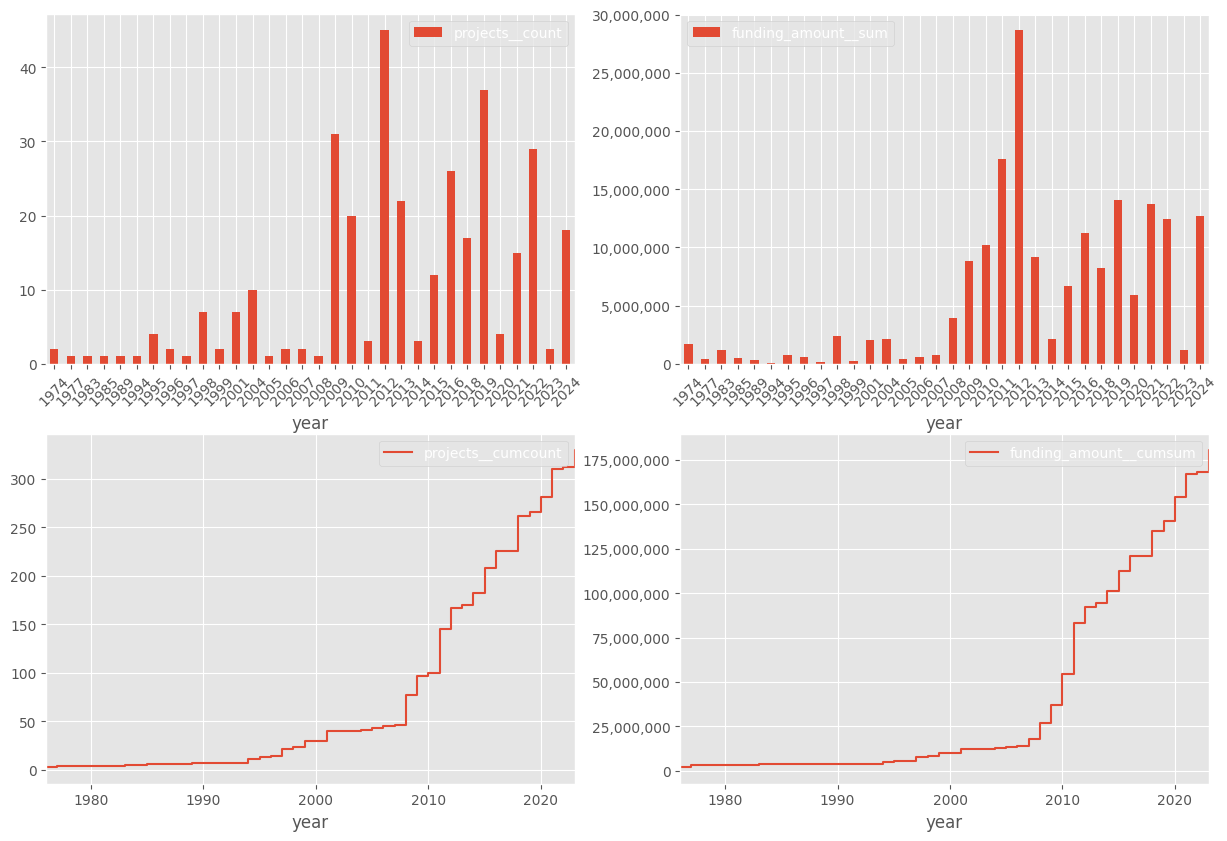

In [54]:
f, axes = plt.subplots(nrows=2, ncols=2)
accelerator_related_projects_per_year.plot.bar(ax=axes[0,0], x="year", y=[
    "projects__count"], rot=45, figsize=(15, 10))

accelerator_related_projects_per_year.plot(drawstyle="steps", ax=axes[1, 0], x="year", y=[
    "projects__cumcount"], figsize=(15, 10))
axes[1, 0].set(xlim=(1976, 2023))

accelerator_related_projects_per_year.plot.bar(ax=axes[0, 1], x="year", y=[
    "funding_amount__sum"], rot=45, figsize=(15, 10))
axes[0, 1].yaxis.set_major_formatter(
    matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))

accelerator_related_projects_per_year.plot(drawstyle="steps", ax=axes[1, 1], x="year", y=[
    "funding_amount__cumsum"], figsize=(15, 10))
axes[1, 1].set(xlim=(1976, 2023))
axes[1, 1].yaxis.set_major_formatter(
    matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
